In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:



df = pd.read_csv('/content/df2.csv', delimiter = ',')
df=df.drop("class",axis=1)
df.head()

,Make,Model,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,prestige
0,Toyota,Prius,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,2
1,Renault,Grand Scenic,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,2
2,Renault,Laguna,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,3
3,Opel,Astra,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,3
4,Mercedes,Vito,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,4


In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()


In [ ]:

display(categorical_features)
display(numerical_features)


['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']

['Distance',
 'Engine_capacity(cm3)',
 'Price(euro)',
 'Age',
 'km_year',
 'prestige']

In [ ]:
X=df[numerical_features]

In [ ]:

scale=StandardScaler()
X=scale.fit_transform(X)

In [ ]:

from sklearn.decomposition import PCA

In [ ]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_

    plt.figure(figsize=(20, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]),
                    va="bottom",
                    ha="center",
                    fontsize=12)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')


In [ ]:

#Selecting the Right Number of Dimensions
def get_pca_components(pca, var):
    cumm_var = pca.explained_variance_ratio_
    total_var = 0.
    N_COMPONENTS = 0
    for i in cumm_var:
        N_COMPONENTS += 1
        total_var += i
        if total_var >= var:
            break
    return N_COMPONENTS

In [ ]:

pca=PCA(n_components=5)
pca.fit(X)

PCA(n_components=5)

In [ ]:
pca.explained_variance_ratio_

array([0.45583655, 0.24345533, 0.19151301, 0.05360917, 0.03620172])

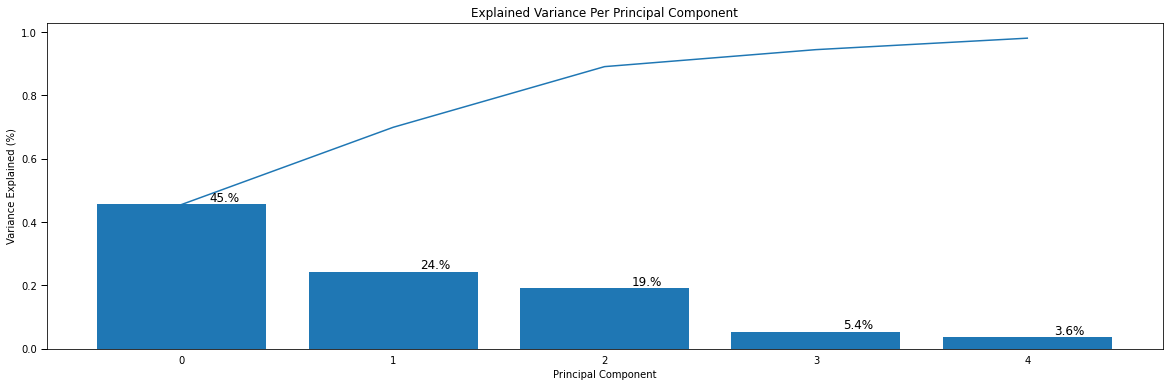

In [ ]:
scree_plot(pca)

In [ ]:
n_components = get_pca_components(pca, 0.95)
n_components

5

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

In [ ]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [ ]:
components = pd.DataFrame(np.round(pca.components_, 4))
components

,0,1,2,3,4,5
0,-0.2785,0.1869,0.5161,-0.5128,0.2214,-0.5560
1,0.6808,0.0637,-0.0734,-0.0495,0.7222,-0.0545
2,0.2038,0.8459,0.2318,0.3735,-0.2202,-0.0347
3,0.2615,-0.4715,0.7284,0.4082,-0.1053,-0.0317
4,-0.0706,0.1429,0.3783,-0.3671,0.1295,0.8246



 [0.45583655 0.69929189 0.89080489 0.94441406 0.98061578]


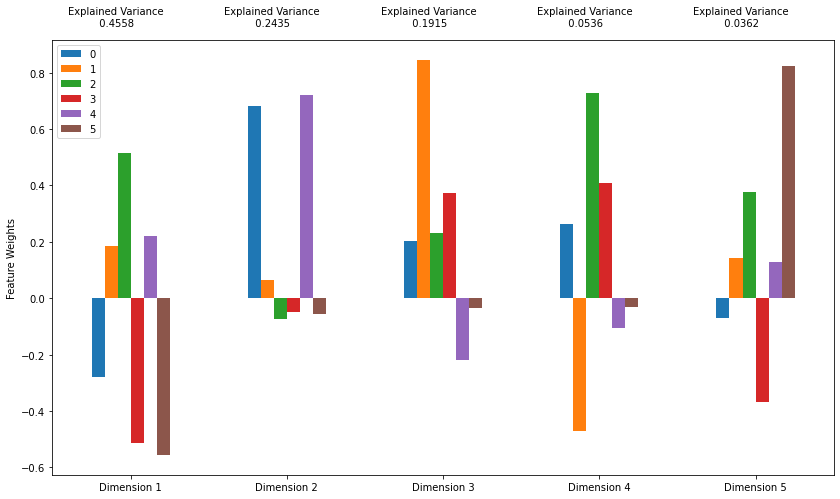

In [ ]:
pca = PCA(n_components=5).fit(X)
x_pca = pca.transform(X)
# Generate PCA results plot
pca_results = pca_results(x_pca, pca)

# cumulative explaned variance
print('\n', np.cumsum(pca.explained_variance_ratio_))

In [ ]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,0,1,2,3,4,5
Dimension 1,0.4558,-0.2785,0.1869,0.5161,-0.5128,0.2214,-0.5560
Dimension 2,0.2435,0.6808,0.0637,-0.0734,-0.0495,0.7222,-0.0545
Dimension 3,0.1915,0.2038,0.8459,0.2318,0.3735,-0.2202,-0.0347
Dimension 4,0.0536,0.2615,-0.4715,0.7284,0.4082,-0.1053,-0.0317
Dimension 5,0.0362,-0.0706,0.1429,0.3783,-0.3671,0.1295,0.8246


pandas.core.frame.DataFrame

Dimension 1    0.4558
Dimension 2    0.6993
Dimension 3    0.8908
Dimension 4    0.9444
Dimension 5    0.9806
Name: Explained Variance, dtype: float64

In [ ]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(x_pca, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5
0,0.3683,0.4430,-0.3137,-0.2155,-0.2806
1,0.6930,-0.1098,-0.9760,-0.2543,-0.1338
2,-0.1564,-0.9299,-0.8291,-0.3083,0.3337
3,-0.9190,-0.1159,-0.2801,0.0072,-0.0910
4,-1.9660,0.7266,1.0099,0.0827,0.3950
...,...,...,...,...,...
32069,1.1650,-0.6607,-0.6311,-0.4785,0.1534
32070,-1.2428,-0.0615,0.3075,0.1938,-0.2790
32071,0.6951,-0.8513,-1.0430,-0.5022,-0.1824
32072,-1.0003,2.2632,0.3324,0.0270,0.0559


In [ ]:
pca = PCA(n_components=2).fit(X)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(X)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [ ]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(reduced_data, 4), columns = ['Dimension 1', 'Dimension 2']))
print(reduced_data[:10])

,Dimension 1,Dimension 2
0,0.3683,0.4430
1,0.6930,-0.1098
2,-0.1564,-0.9299
3,-0.9190,-0.1159
4,-1.9660,0.7266
...,...,...
32069,1.1650,-0.6607
32070,-1.2428,-0.0615
32071,0.6951,-0.8513
32072,-1.0003,2.2632


   Dimension 1  Dimension 2
0     0.368344     0.443005
1     0.693012    -0.109818
2    -0.156386    -0.929902
3    -0.918971    -0.115900
4    -1.965979     0.726594
5    -0.536407     1.716956
6     1.418607     0.724453
7    -2.609675    -0.358442
8    -2.208852     1.184561
9     0.563929     0.539935


In [ ]:
def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.

    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute
    return: a matplotlib AxesSubplot object (for any additional customization)

    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'],
        facecolors='b', edgecolors='b', s=70, alpha=0.5)

    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1],
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black',
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return

In [ ]:
X_=pd.DataFrame(X)

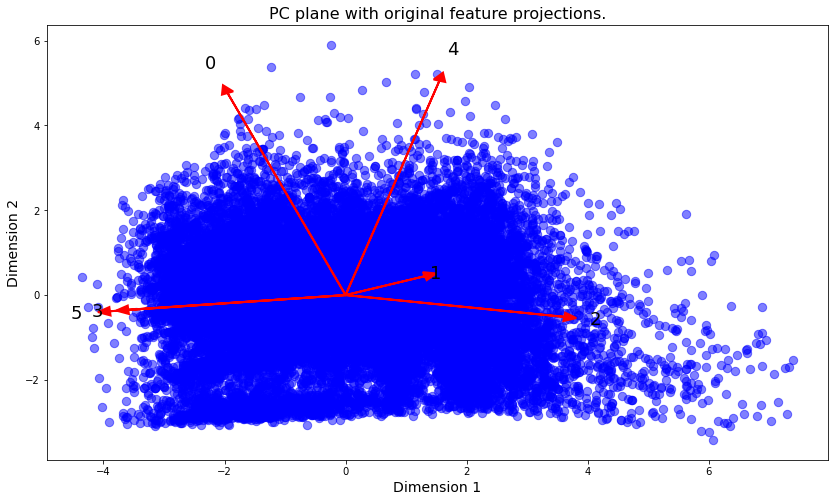

In [ ]:
biplot(X_, reduced_data, pca)

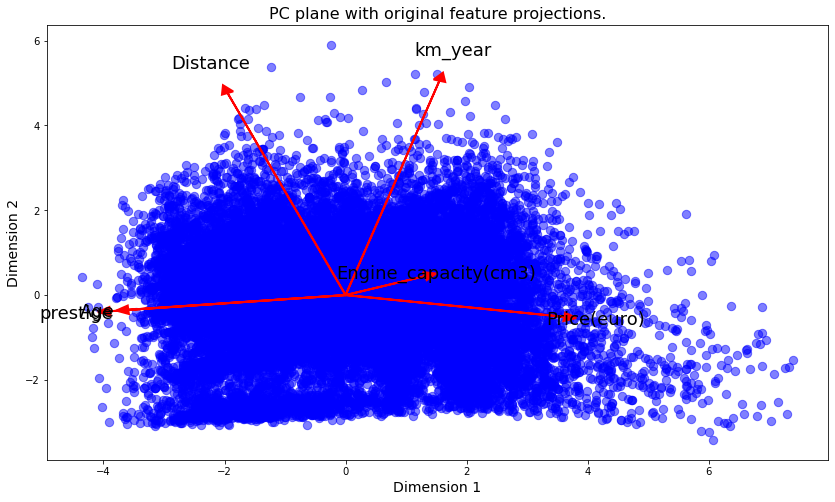

In [ ]:
biplot(df[numerical_features], reduced_data, pca)

7 clusters: 0.35094
6 clusters: 0.35258
5 clusters: 0.35399
4 clusters: 0.33766
3 clusters: 0.34964
2 clusters: 0.39158


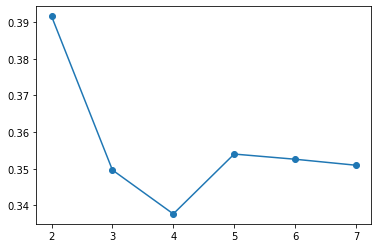

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#keep the scores for each cluster size
sil_scores = []

random_state = 7

for i in range(7,1,-1):
    clusterer = KMeans(i, random_state=random_state).fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_data)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    sil_scores.append(score)
    print(i, 'clusters:', score.round(5))

# plot the scores
import matplotlib.pyplot as plt
_ = plt.plot(np.arange(7,1,-1), sil_scores, '-o')

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

clusterer = GaussianMixture(n_components=2, covariance_type='full')
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print("Silhouette coefficient for {} clusters: {:.3f}".format(2, score))

Silhouette coefficient for 2 clusters: 0.391


In [ ]:
import matplotlib.cm as cm

In [ ]:

k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 35)
k_means.fit(X)

KMeans(n_clusters=5, n_init=35)

In [ ]:
def visualise(X, C, K):# Visualization of clustering. You don't need to change this function
    plt.figure(figsize=(10,6))
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=C,cmap='rainbow')
    plt.title('Visualization of K = '+str(K), fontsize=15)
    plt.show()
    pass

<Figure size 720x432 with 0 Axes>

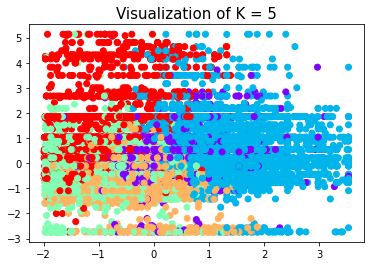

In [ ]:
visualise(X, k_means.labels_, 5)

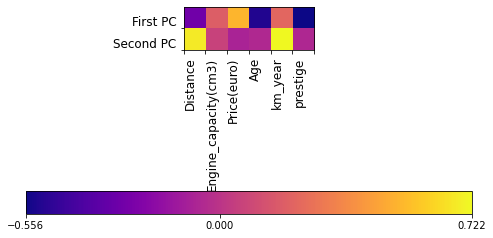

In [ ]:
# Plotting the magnitude of each feature value for the first two principal components
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = numerical_features

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0,
                                              pca.components_.max()], pad=0.65);

In [ ]:
kmeans=KMeans(n_clusters=5,init="k-means++",n_init=10,max_iter=1000,verbose=0,random_state=None,copy_x=True,algorithm="auto")
y_kmeans=kmeans.fit_predict(reduced_data)

In [ ]:
y_kmeans

array([4, 4, 4, ..., 4, 0, 0], dtype=int32)

In [ ]:
reduced_data.shape

(32074, 2)

In [ ]:
filtered_label0=x_pca[y_kmeans==0]

In [ ]:
reduced_data

,Dimension 1,Dimension 2
0,0.368344,0.443005
1,0.693012,-0.109818
2,-0.156386,-0.929902
3,-0.918971,-0.115900
4,-1.965979,0.726594
...,...,...
32069,1.165033,-0.660731
32070,-1.242838,-0.061461
32071,0.695132,-0.851261
32072,-1.000309,2.263173


In [ ]:
y_kmeans[y_kmeans==2].shape

(4385,)

In [ ]:
y_kmeans[y_kmeans==0].shape

(7230,)

In [ ]:
reduced_data[y_kmeans==0][:5]

,Dimension 1,Dimension 2
4,-1.965979,0.726594
5,-0.536407,1.716956
7,-2.609675,-0.358442
8,-2.208852,1.184561
11,-1.195798,0.605064


In [ ]:
filtered_label0=reduced_data[y_kmeans==0] #give that index where y_kmeans==0 for reduced_data
filtered_label1=reduced_data[y_kmeans==1]
filtered_label2=reduced_data[y_kmeans==2]
filtered_label3=reduced_data[y_kmeans==3]
filtered_label4=reduced_data[y_kmeans==4]

In [ ]:
filtered_label0.shape

(7230, 2)

In [ ]:
filtered_label0.iloc[:,0]

4       -1.965979
5       -0.536407
7       -2.609675
8       -2.208852
11      -1.195798
           ...   
32060   -2.890520
32062   -1.813189
32070   -1.242838
32072   -1.000309
32073   -1.071818
Name: Dimension 1, Length: 7230, dtype: float64

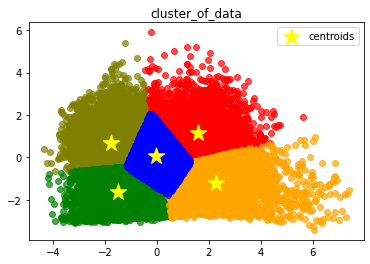

In [ ]:
plt.scatter(filtered_label0.iloc[:,0],filtered_label0.iloc[:,1],color="olive",alpha=0.7)
plt.scatter(filtered_label1.iloc[:,0],filtered_label1.iloc[:,1],color="red",alpha=0.7)
plt.scatter(filtered_label2.iloc[:,0],filtered_label2.iloc[:,1],color="green",alpha=0.7)
plt.scatter(filtered_label3.iloc[:,0],filtered_label3.iloc[:,1],color="orange",alpha=0.7)
plt.scatter(filtered_label4.iloc[:,0],filtered_label4.iloc[:,1],color="blue",alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="*",s=300,c="yellow",label='centroids')
plt.title("cluster_of_data")
plt.legend()
plt.show()

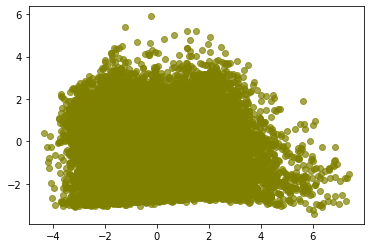

In [ ]:
plt.scatter(reduced_data.iloc[:,0],reduced_data.iloc[:,1],color="olive",alpha=0.7)

In [ ]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 35)
k_means.fit(reduced_data)

KMeans(n_clusters=5, n_init=35)

<Figure size 720x432 with 0 Axes>

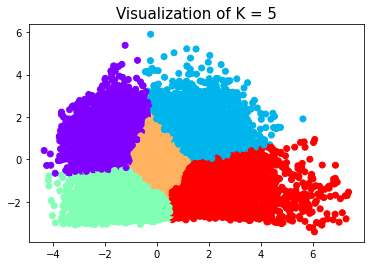

In [ ]:
visualise(reduced_data.values, k_means.labels_, 5)